In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(420)

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [3]:
def getBestK_KNN(X_train,y_train,X_test,y_test,n):
    knn_K_results = pd.DataFrame(columns=["model","accuracy","precision","recall","f1_score"])
    for k in range(1,n):
        knn_model = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
        knn_model.fit(X_train,y_train)
        predict_test = knn_model.predict(X_test)
        print(k,"Fitted")
        acc = accuracy_score(y_test, predict_test)*100 
        pre = precision_score(y_test, predict_test)
        rec = recall_score(y_test, predict_test)
        f1_ = f1_score(y_test, predict_test)
        knn_K_results = knn_K_results.append({"model":"KNN- n="+str(k),"accuracy":acc,"precision":pre,"recall":rec,"f1_score":f1_},ignore_index=True)
    knn_K_results["test_error"] = 100 - knn_K_results["accuracy"]
    return knn_K_results
    
    plt.figure(figsize=(16,20),dpi=200)
    plt.plot(range(1,n),knn_K_results["test_error"],label='Test Error')
    plt.legend()
    plt.ylabel('Error Rate')
    plt.xlabel("K Value")
    plt.xticks(range(1,n))
    plt.show()

In [4]:
def get_accuracy(name, trained_model , x_train, y_train, x_test, y_test):
    model_predict1 = trained_model.predict(x_train)
    print("Training accuracy  :",accuracy_score(y_train, model_predict1).round(3)*100 ,"%")
    
    model_predict = trained_model.predict(x_test)
    acc = accuracy_score(y_test, model_predict).round(3)*100 
    pre = precision_score(y_test, model_predict)
    rec = recall_score(y_test, model_predict)
    f1_ = f1_score(y_test, model_predict)
    

    print("Testing accuracy   :",acc , "%")
    print("precision : ",pre)
    print("recall    : ",rec)
    print("f1_score  : ",f1_)
    

    cf1 = confusion_matrix(y_test,model_predict)

    sns.heatmap(cf1,annot=True,fmt = '.0f')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title(name+ ' Confusion Matrix')
    plt.show()

    print(classification_report(y_train,  model_predict1))
    print(classification_report(y_test,  model_predict))
    return{"model": name,"accuracy":acc,"precision":pre,"recall":rec,"f1_score":f1_}

In [5]:
def SVM_3models(df, X_train, y_train, X_test, y_test):
    model = svm.SVC(kernel ='linear')
    model.fit(X_train,y_train)
    df = df.append(get_accuracy("SVM - linear Kernal", model, X_train, y_train, X_test, y_test),ignore_index=True)

    model = svm.SVC(kernel ='poly',degree=2)
    model.fit(X_train,y_train)
    df = df.append(get_accuracy("SVM - Polynomial 2 Kernal", model, X_train, y_train, X_test, y_test),ignore_index=True)

    model = svm.SVC(kernel ='sigmoid')
    model.fit(X_train,y_train)
    df = df.append(get_accuracy("SVM - Sigmoid Kernal", model, X_train, y_train, X_test, y_test),ignore_index=True)
    return df

# Gene Expression dataset

In [6]:
df=pd.read_csv("gene_expression.csv")
print(df.shape)
print(df.info())
df.head()

(3000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB
None


,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [7]:
(df.isna().sum()/len(df)*100).round(3)

Gene One          0.0
Gene Two          0.0
Cancer Present    0.0
dtype: float64

In [8]:
print("Cancer Present",len(df["Cancer Present"].unique()),df["Cancer Present"].unique())

Cancer Present 2 [1 0]


In [9]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)
Gene_Expression_results = pd.DataFrame(columns=["model","accuracy","precision","recall","f1_score"])


In [10]:
scl = MinMaxScaler(feature_range=(0, 1)) 
X_train = scl.fit_transform(X_train)
X_test= scl.transform(X_test)

Training accuracy  : 85.91666666666666 %
Testing accuracy   : 85.0 %
precision :  0.8506493506493507
recall    :  0.8562091503267973
f1_score  :  0.8534201954397393


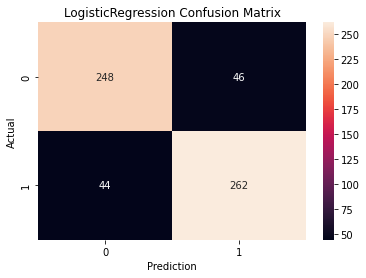

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1206
           1       0.86      0.86      0.86      1194

    accuracy                           0.86      2400
   macro avg       0.86      0.86      0.86      2400
weighted avg       0.86      0.86      0.86      2400

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       294
           1       0.85      0.86      0.85       306

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



In [11]:
model = LogisticRegression() #class_weight=inv_weights
model.fit(X_train,y_train)
Gene_Expression_results = Gene_Expression_results.append(get_accuracy("LogisticRegression", model, X_train, y_train, X_test, y_test),ignore_index=True)

Training accuracy  : 85.83333333333333 %
Testing accuracy   : 85.16666666666667 %
precision :  0.8534201954397395
recall    :  0.8562091503267973
f1_score  :  0.8548123980424144


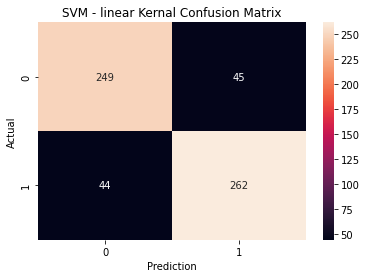

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1206
           1       0.86      0.85      0.86      1194

    accuracy                           0.86      2400
   macro avg       0.86      0.86      0.86      2400
weighted avg       0.86      0.86      0.86      2400

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       294
           1       0.85      0.86      0.85       306

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600

Training accuracy  : 85.79166666666667 %
Testing accuracy   : 84.5 %
precision :  0.8338557993730408
recall    :  0.869281045751634
f1_score  :  0.8512


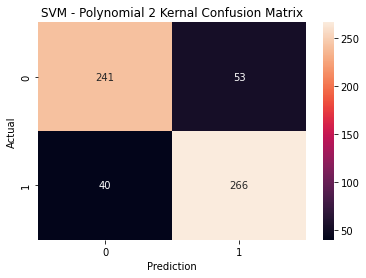

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1206
           1       0.84      0.88      0.86      1194

    accuracy                           0.86      2400
   macro avg       0.86      0.86      0.86      2400
weighted avg       0.86      0.86      0.86      2400

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       294
           1       0.83      0.87      0.85       306

    accuracy                           0.84       600
   macro avg       0.85      0.84      0.84       600
weighted avg       0.85      0.84      0.84       600

Training accuracy  : 60.54166666666667 %
Testing accuracy   : 62.16666666666667 %
precision :  0.5752380952380952
recall    :  0.9869281045751634
f1_score  :  0.7268351383874849


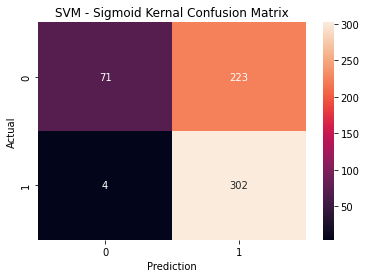

              precision    recall  f1-score   support

           0       0.95      0.23      0.36      1206
           1       0.56      0.99      0.71      1194

    accuracy                           0.61      2400
   macro avg       0.76      0.61      0.54      2400
weighted avg       0.76      0.61      0.54      2400

              precision    recall  f1-score   support

           0       0.95      0.24      0.38       294
           1       0.58      0.99      0.73       306

    accuracy                           0.62       600
   macro avg       0.76      0.61      0.56       600
weighted avg       0.76      0.62      0.56       600



In [12]:
Gene_Expression_results = SVM_3models(Gene_Expression_results,X_train,y_train,X_test,y_test)

1 Fitted
2 Fitted
3 Fitted
4 Fitted
5 Fitted
6 Fitted
7 Fitted
8 Fitted
9 Fitted
10 Fitted
11 Fitted
12 Fitted
13 Fitted
14 Fitted
15 Fitted
16 Fitted
17 Fitted
18 Fitted
19 Fitted
20 Fitted


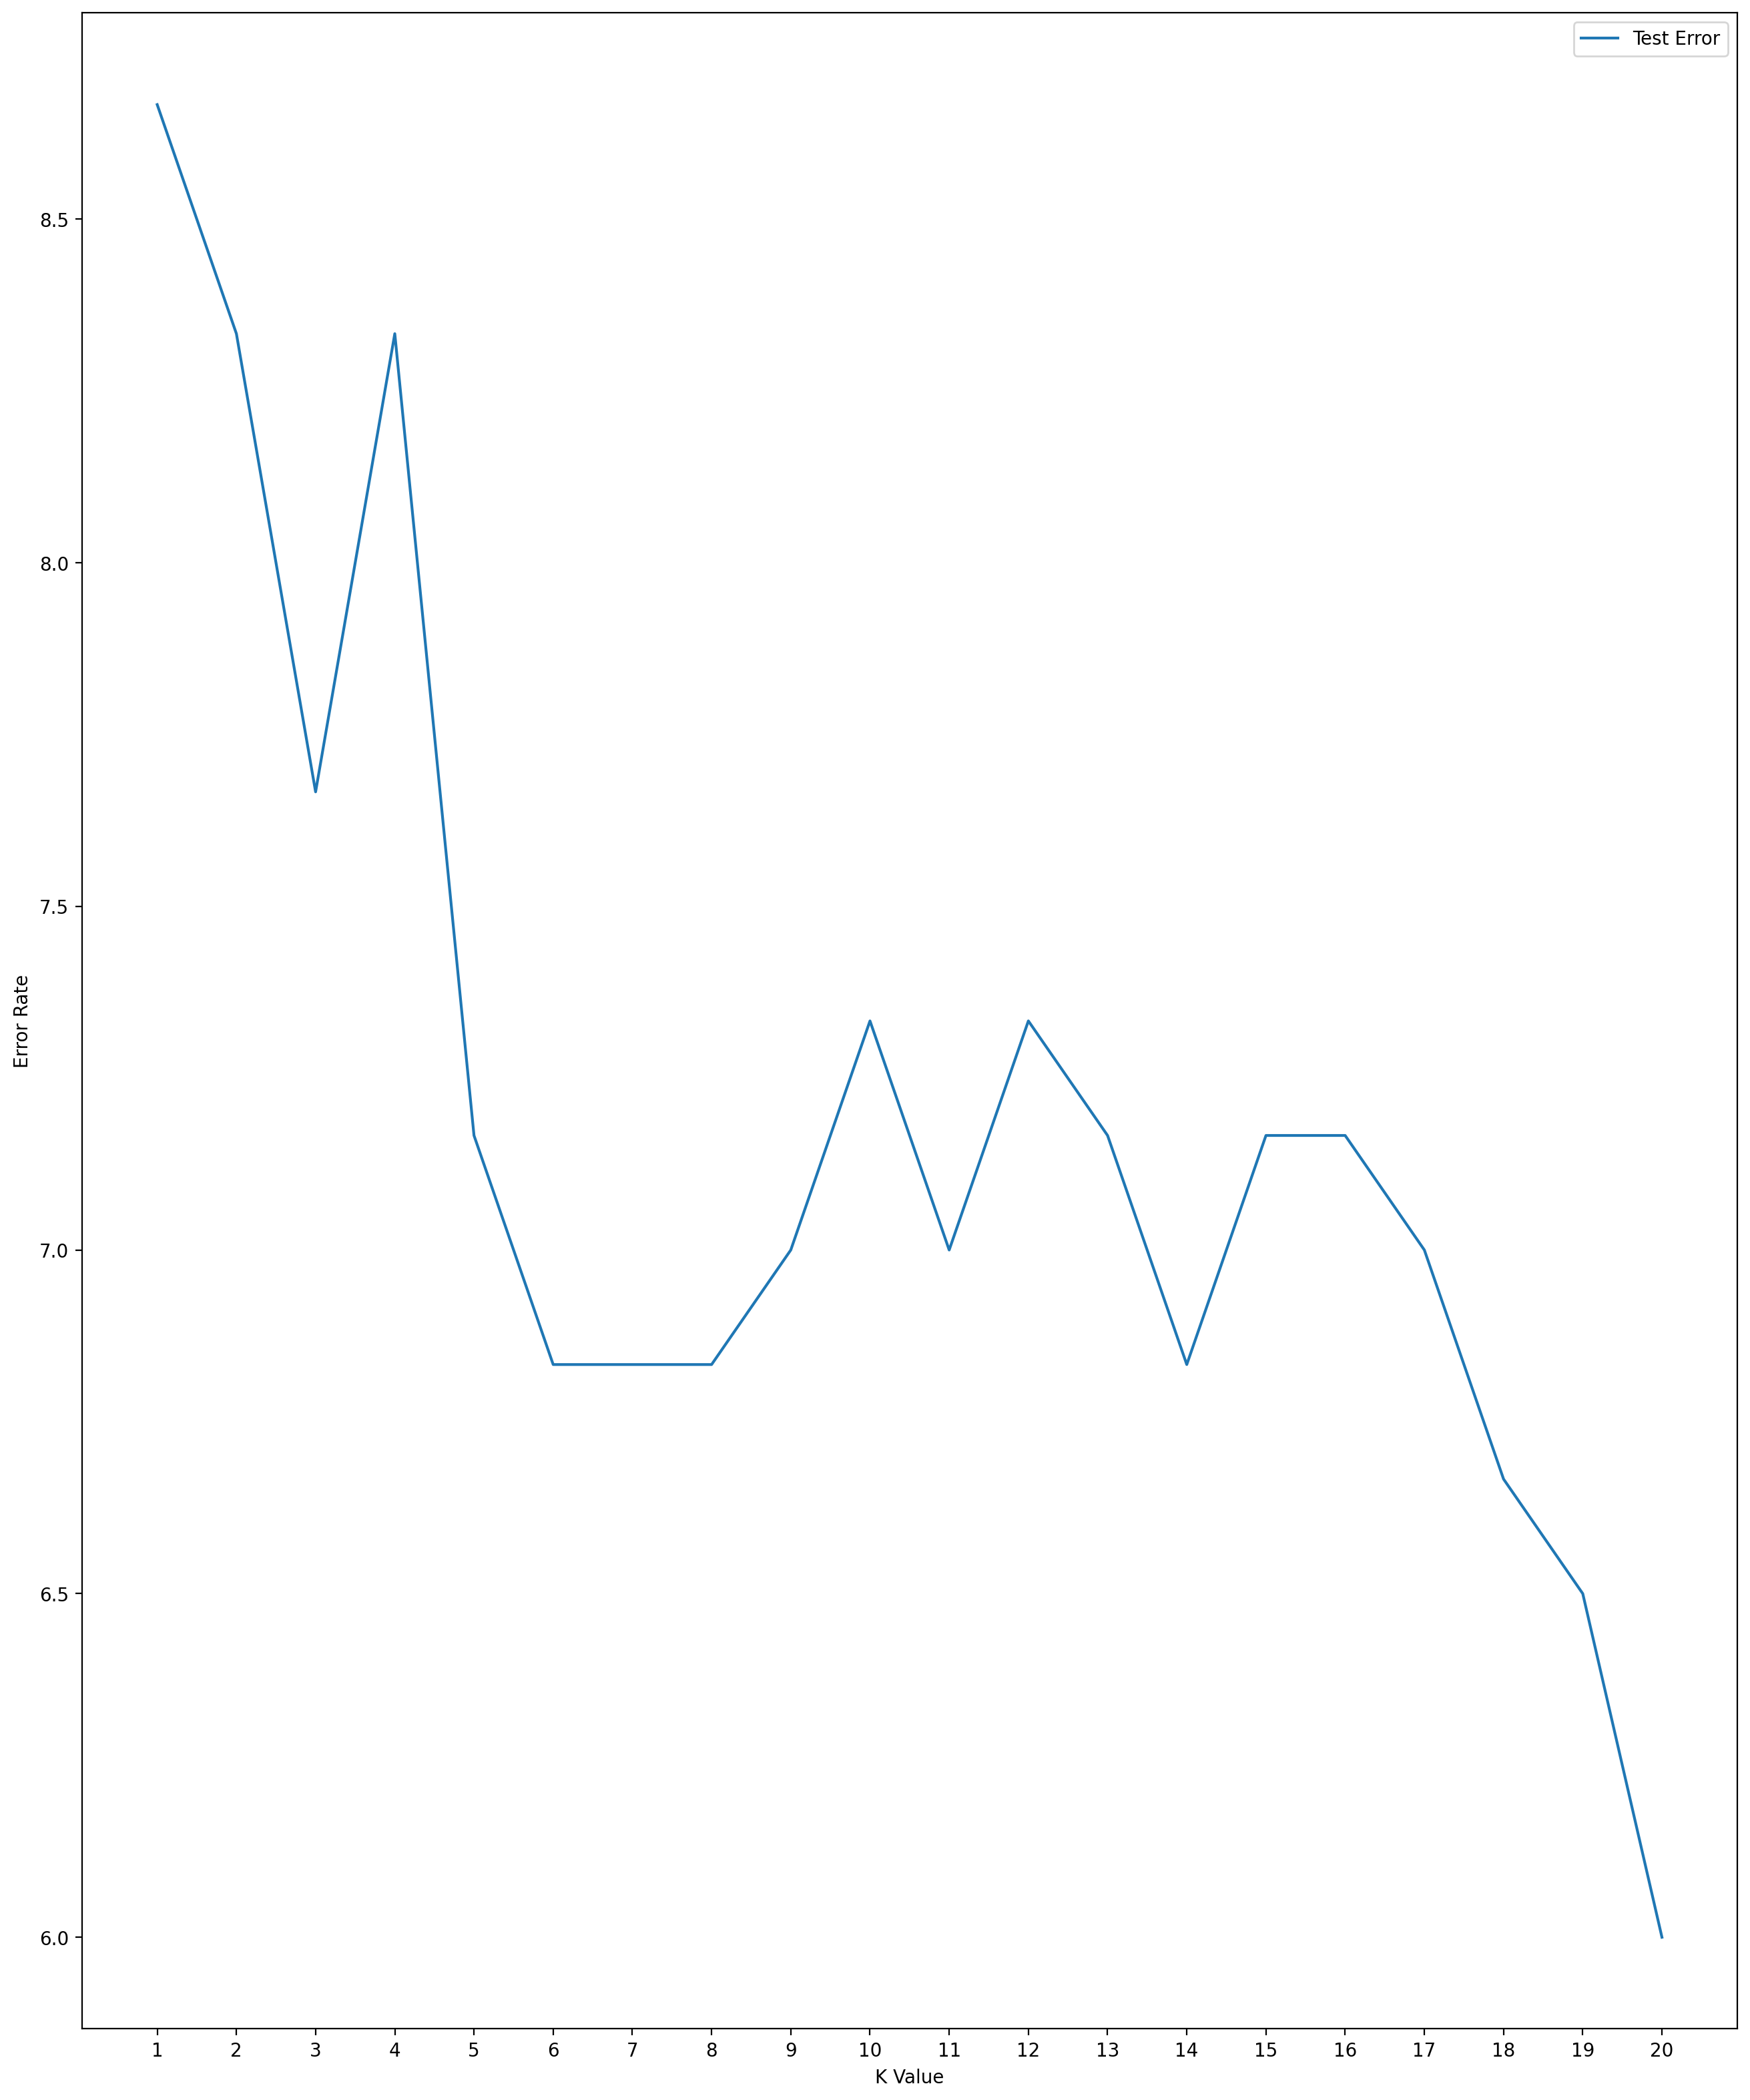

In [13]:
knn_results = getBestK_KNN(X_train,y_train,X_test,y_test,21)
plt.figure(figsize=(16,20),dpi=200)
plt.plot(range(1,21),knn_results["test_error"],label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")
plt.xticks(range(1,21))
plt.show()

> #### Choosing n = 7

In [14]:
Gene_Expression_results = Gene_Expression_results.append(knn_results.iloc[6])
Gene_Expression_results = Gene_Expression_results.drop("test_error",axis =1)
Gene_Expression_results

,model,accuracy,precision,recall,f1_score
0,LogisticRegression,85.000000,0.850649,0.856209,0.853420
1,SVM - linear Kernal,85.166667,0.853420,0.856209,0.854812
2,SVM - Polynomial 2 Kernal,84.500000,0.833856,0.869281,0.851200
3,SVM - Sigmoid Kernal,62.166667,0.575238,0.986928,0.726835
6,KNN- n=7,93.166667,0.949153,0.915033,0.931780


>> #### Choosing KNN as the best model for classifying Cancer as it got high accuracy and most importantly high recall 

# Income dataset

In [15]:
df=pd.read_csv("Income_dataset_train.csv")
print(df.shape)
print(df.info())
df.head()

(43957, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB
None


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [16]:
(df.isna().sum()/len(df)*100).round(3)

age                0.000
workclass          5.683
fnlwgt             0.000
education          0.000
educational-num    0.000
marital-status     0.000
occupation         5.701
relationship       0.000
race               0.000
gender             0.000
capital-gain       0.000
capital-loss       0.000
hours-per-week     0.000
native-country     1.736
income_>50K        0.000
dtype: float64

In [17]:
# dropping null values from the columns if they are less than 2%
missing_percentage= (df.isna().sum()/len(df)*100).round(3)
rows_to_drop = missing_percentage[(missing_percentage<2)& (missing_percentage>0)].index
print(rows_to_drop.values)
if(len(rows_to_drop.values)>0):
    print(df.shape)
    df = df[~df[rows_to_drop.values[0]].isna()]
    print(df.shape)
    print((df.isna().sum()/len(df)*100).round(3))

['native-country']
(43957, 15)
(43194, 15)
age                0.000
workclass          5.693
fnlwgt             0.000
education          0.000
educational-num    0.000
marital-status     0.000
occupation         5.711
relationship       0.000
race               0.000
gender             0.000
capital-gain       0.000
capital-loss       0.000
hours-per-week     0.000
native-country     0.000
income_>50K        0.000
dtype: float64


In [18]:
to_fill = df.columns[df.isnull().any()].tolist()
to_fill

['workclass', 'occupation']

In [19]:
for col in to_fill:
    print(col+"   -----"+"\n"+str(df[col].value_counts(normalize=True)))

workclass   -----
Private             0.737867
Self-emp-not-inc    0.083565
Local-gov           0.068541
State-gov           0.042249
Self-emp-inc        0.036111
Federal-gov         0.030981
Without-pay         0.000491
Never-worked        0.000196
Name: workclass, dtype: float64
occupation   -----
Craft-repair         0.133400
Exec-managerial      0.132958
Prof-specialty       0.132099
Adm-clerical         0.121394
Sales                0.119749
Other-service        0.106760
Machine-op-inspct    0.065387
Transport-moving     0.051195
Handlers-cleaners    0.045523
Farming-fishing      0.032853
Tech-support         0.031822
Protective-serv      0.021288
Priv-house-serv      0.005279
Armed-Forces         0.000295
Name: occupation, dtype: float64


> #### Filling with mode for first col is fine and a decent lazy solution to the second column xD 

In [20]:
for col in to_fill:
    df[col].fillna(df[col].mode()[0], inplace=True)
print((df.isna().sum()/len(df)*100).round(3))

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income_>50K        0.0
dtype: float64


In [21]:
df2=pd.read_csv("Income_dataset_test.csv")
print(df2.shape)
print(df2.info())
df2.head()

(899, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              899 non-null    int64 
 1   workclass        899 non-null    object
 2   fnlwgt           899 non-null    int64 
 3   education        899 non-null    object
 4   educational-num  899 non-null    int64 
 5   marital-status   899 non-null    object
 6   occupation       899 non-null    object
 7   relationship     899 non-null    object
 8   race             899 non-null    object
 9   gender           899 non-null    object
 10  capital-gain     899 non-null    int64 
 11  capital-loss     899 non-null    int64 
 12  hours-per-week   899 non-null    int64 
 13  native-country   899 non-null    object
dtypes: int64(6), object(8)
memory usage: 98.5+ KB
None


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,Self-emp-not-inc,327120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Portugal
1,32,Private,123253,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,42,United-States
2,47,Private,232628,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States
3,19,Private,374262,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States
4,46,Self-emp-not-inc,311231,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States


> #### Test dataset does not have a label column and probably meant for kaggle competition submission or something like that

In [22]:
print("income_>50K",len(df["income_>50K"].unique()),df["income_>50K"].unique())

income_>50K 2 [1 0]


In [23]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,Private,Doctorate,Divorced,Exec-managerial,Not-in-family,White,Male,United-States
1,Private,12th,Never-married,Other-service,Own-child,White,Male,United-States
2,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
3,State-gov,7th-8th,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States
4,State-gov,Some-college,Never-married,Other-service,Not-in-family,Black,Male,United-States


In [24]:
data_encoded = pd.get_dummies(data=df_cat)
data_encoded                #PCA could be used to reduce the number of columns

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
43953,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
43954,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
43955,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
df = df.drop(df_cat, axis=1)
df

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
0,67,366425,16,99999,0,60,1
1,17,244602,8,0,0,15,0
2,31,174201,13,0,0,40,1
3,58,110199,4,0,0,40,0
4,25,149248,10,0,0,40,0
...,...,...,...,...,...,...,...
43952,52,68982,13,0,0,50,1
43953,19,116562,9,0,0,40,0
43954,30,197947,10,0,0,58,0
43955,46,97883,13,0,0,35,0


In [26]:
df = pd.concat([df,data_encoded],axis=1)

In [27]:
X = df.drop('income_>50K',axis=1)
y = df['income_>50K']

weights = dict(y.value_counts(normalize=True))
print(y.value_counts(normalize=True))
inv_weights = {0.0:weights[1.0],1.0:weights[0.0]}
inv_weights

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)
Income_results = pd.DataFrame(columns=["model","accuracy","precision","recall","f1_score"])


0    0.761008
1    0.238992
Name: income_>50K, dtype: float64


In [28]:
scl = MinMaxScaler(feature_range=(0, 1)) 
X_train = scl.fit_transform(X_train)
X_test= scl.transform(X_test)

Training accuracy  : 80.68007524236724 %
Testing accuracy   : 80.12501446926727 %
precision :  0.5587859424920127
recall    :  0.8388489208633093
f1_score  :  0.6707574304889742


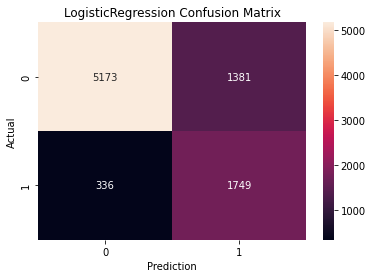

              precision    recall  f1-score   support

           0       0.94      0.79      0.86     26317
           1       0.56      0.85      0.68      8238

    accuracy                           0.81     34555
   macro avg       0.75      0.82      0.77     34555
weighted avg       0.85      0.81      0.82     34555

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      6554
           1       0.56      0.84      0.67      2085

    accuracy                           0.80      8639
   macro avg       0.75      0.81      0.76      8639
weighted avg       0.85      0.80      0.81      8639



In [29]:
model = LogisticRegression(class_weight=inv_weights) #class_weight=inv_weights
model.fit(X_train,y_train)
Income_results = Income_results.append(get_accuracy("LogisticRegression", model, X_train, y_train, X_test, y_test),ignore_index=True)

Training accuracy  : 85.34510201128636 %
Testing accuracy   : 85.13716865377937 %
precision :  0.7517284726587052
recall    :  0.573621103117506
f1_score  :  0.6507072905331883


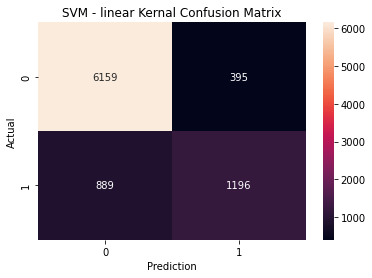

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     26317
           1       0.75      0.58      0.65      8238

    accuracy                           0.85     34555
   macro avg       0.81      0.76      0.78     34555
weighted avg       0.85      0.85      0.85     34555

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      6554
           1       0.75      0.57      0.65      2085

    accuracy                           0.85      8639
   macro avg       0.81      0.76      0.78      8639
weighted avg       0.84      0.85      0.84      8639

Training accuracy  : 84.87917812183476 %
Testing accuracy   : 84.26901261720107 %
precision :  0.7410358565737052
recall    :  0.5352517985611511
f1_score  :  0.6215538847117795


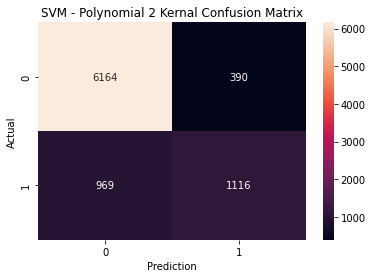

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     26317
           1       0.75      0.55      0.63      8238

    accuracy                           0.85     34555
   macro avg       0.81      0.74      0.77     34555
weighted avg       0.84      0.85      0.84     34555

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6554
           1       0.74      0.54      0.62      2085

    accuracy                           0.84      8639
   macro avg       0.80      0.74      0.76      8639
weighted avg       0.83      0.84      0.83      8639

Training accuracy  : 77.73983504557951 %
Testing accuracy   : 78.27294825790023 %
precision :  0.5508308895405669
recall    :  0.5405275779376498
f1_score  :  0.5456305979181796


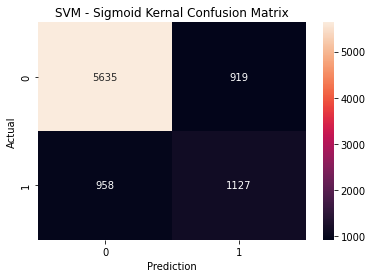

              precision    recall  f1-score   support

           0       0.85      0.86      0.85     26317
           1       0.53      0.52      0.53      8238

    accuracy                           0.78     34555
   macro avg       0.69      0.69      0.69     34555
weighted avg       0.78      0.78      0.78     34555

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      6554
           1       0.55      0.54      0.55      2085

    accuracy                           0.78      8639
   macro avg       0.70      0.70      0.70      8639
weighted avg       0.78      0.78      0.78      8639



In [30]:
Income_results = SVM_3models(Income_results,X_train,y_train,X_test,y_test)

1 Fitted
2 Fitted
3 Fitted
4 Fitted
5 Fitted
6 Fitted
7 Fitted
8 Fitted
9 Fitted
10 Fitted
11 Fitted
12 Fitted
13 Fitted
14 Fitted
15 Fitted
16 Fitted
17 Fitted
18 Fitted
19 Fitted
20 Fitted


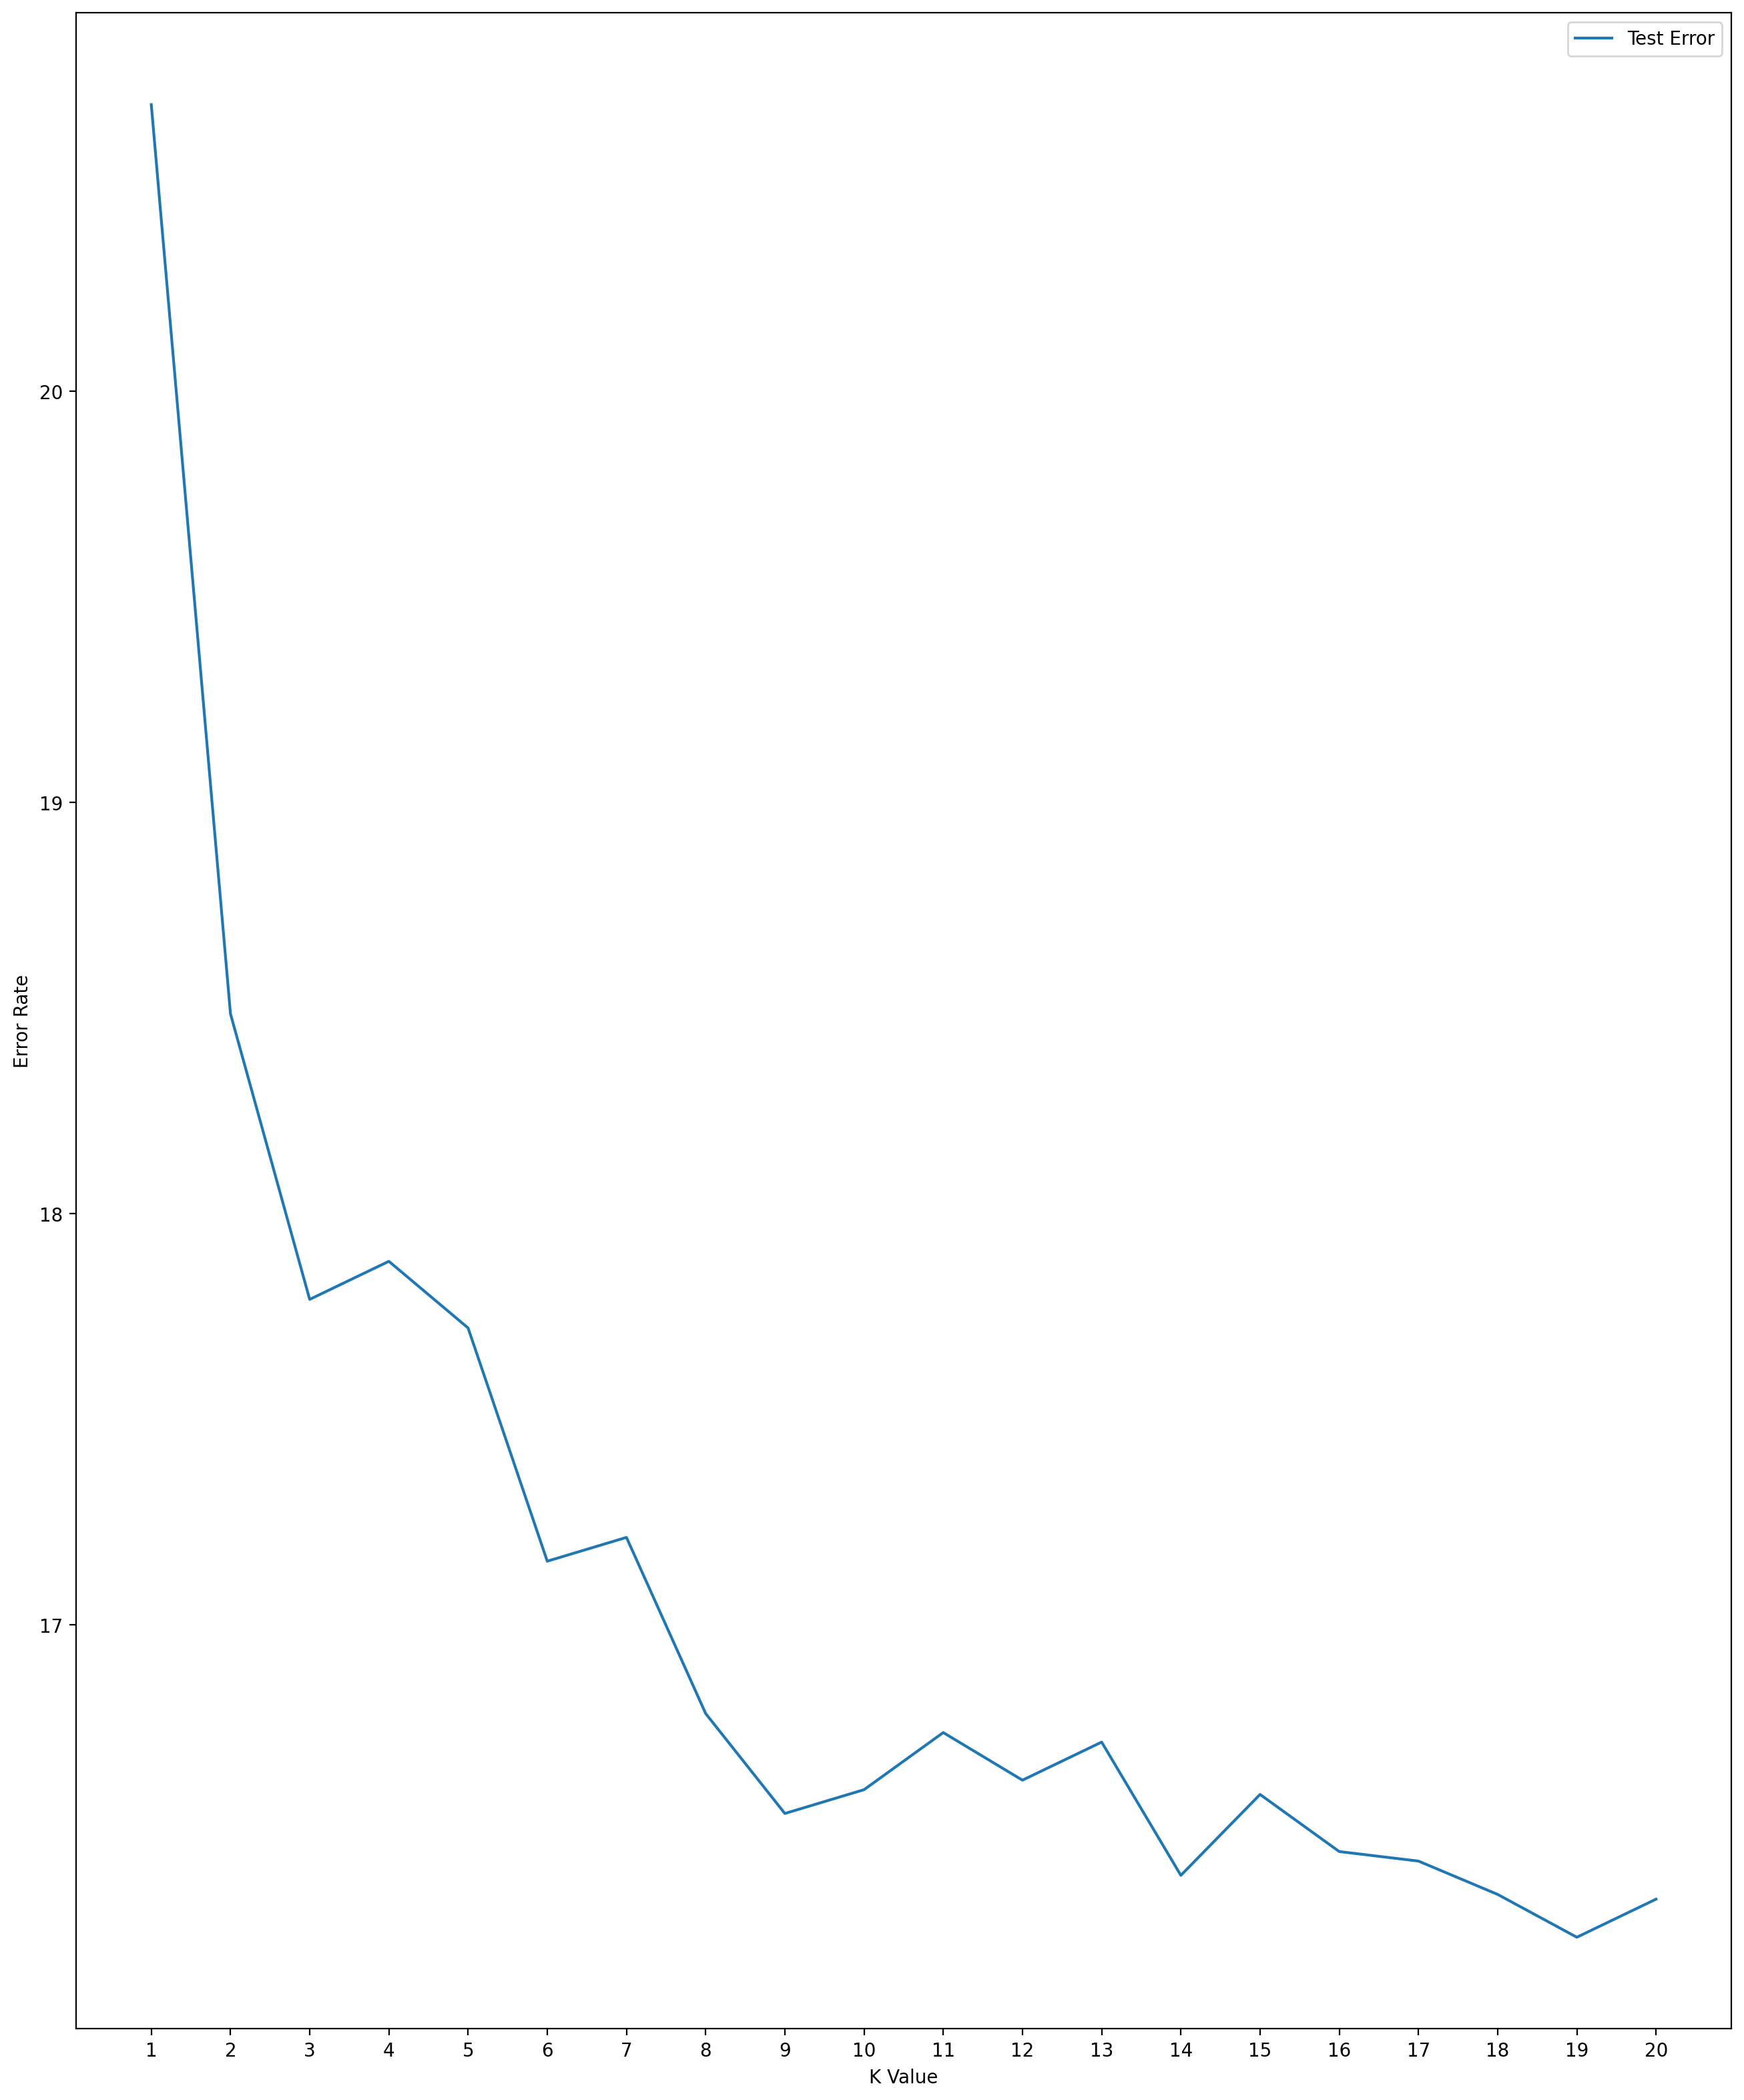

In [31]:
knn_results = getBestK_KNN(X_train,y_train,X_test,y_test,21)
plt.figure(figsize=(16,20),dpi=200)
plt.plot(range(1,21),knn_results["test_error"],label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")
plt.xticks(range(1,21))
plt.show()

> #### Choosing n = 9

In [32]:
Income_results = Income_results.append(knn_results.iloc[8])
Income_results = Income_results.drop("test_error",axis =1)
Income_results

,model,accuracy,precision,recall,f1_score
0,LogisticRegression,80.125014,0.558786,0.838849,0.670757
1,SVM - linear Kernal,85.137169,0.751728,0.573621,0.650707
2,SVM - Polynomial 2 Kernal,84.269013,0.741036,0.535252,0.621554
3,SVM - Sigmoid Kernal,78.272948,0.550831,0.540528,0.545631
8,KNN- n=9,83.458734,0.685730,0.580815,0.628928


>> #### Choosing SVM - linear Kernal as the best model for classifying Income ranges as it got high accuracy and relatively good f1-score

# Heart Disease Dataset

In [33]:
df=pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
print(df.shape)
print(df.info())
df.head()

(253680, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [34]:
(df.isna().sum()/len(df)*100).round(3)

HeartDiseaseorAttack    0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
Diabetes                0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64

> ### No null Values for Heart disease health indicators dataset

In [35]:
cat_columns= []
num_columns = []
for col in df.columns:
    print(col,len(df[col].unique()),df[col].unique())
    if (len(df[col].unique())<7):
        cat_columns.append(col)
    else:
        num_columns.append(col)

HeartDiseaseorAttack 2 [0. 1.]
HighBP 2 [1. 0.]
HighChol 2 [1. 0.]
CholCheck 2 [1. 0.]
BMI 84 [40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]
Smoker 2 [1. 0.]
Stroke 2 [0. 1.]
Diabetes 3 [0. 2. 1.]
PhysActivity 2 [0. 1.]
Fruits 2 [0. 1.]
Veggies 2 [1. 0.]
HvyAlcoholConsump 2 [0. 1.]
AnyHealthcare 2 [1. 0.]
NoDocbcCost 2 [0. 1.]
GenHlth 5 [5. 3. 2. 4. 1.]
MentHlth 31 [18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16. 28. 11. 12. 24. 17. 13. 27. 19. 22.  9. 23.]
PhysHlth 31 [15.  0. 30.  2. 14. 28.  7. 20.  3. 10.  1.  5. 17.  4. 19.  6. 12. 25.
 27. 21. 22.  8. 29. 24.  9. 16. 18. 23. 13. 26. 11.]
DiffWalk 2 [1. 0.]
Sex 2 [0. 1.]
Age 13 [ 9.  7. 11. 10.  8. 13.  4.  6

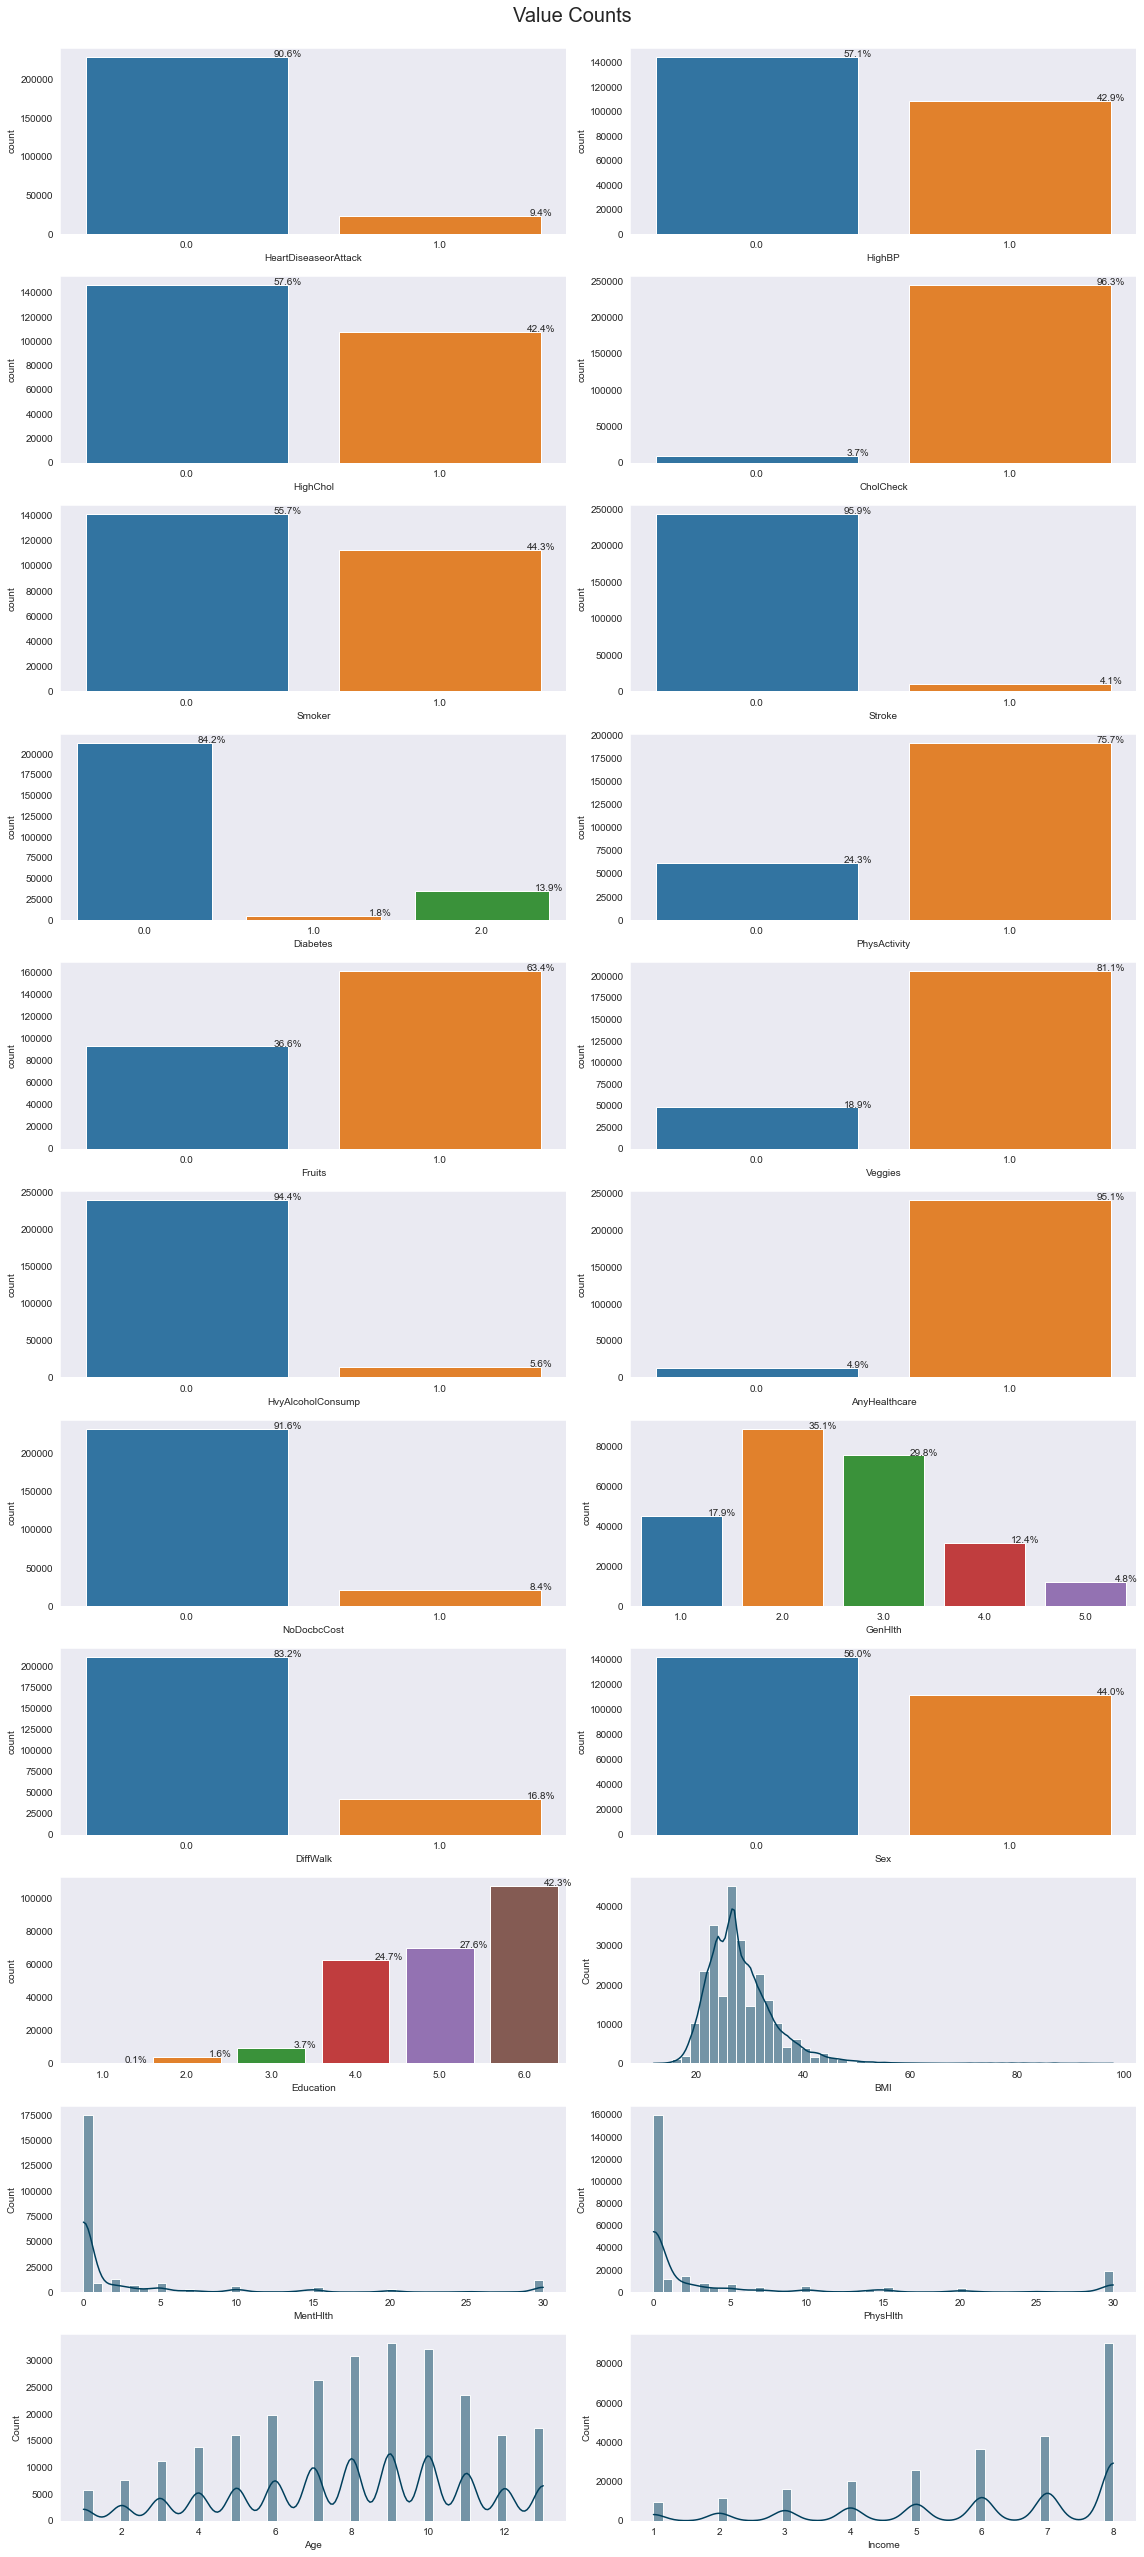

In [36]:
sns.set_style("dark")
plt.figure(figsize=(16,70))
temp = 0
for i,column in enumerate(cat_columns):
    plt.subplot(len(df.columns), 2, i+1)
    plt.suptitle("Value Counts", fontsize=20, x=0.5, y=1)
    ax = sns.countplot(data=df, x=column)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    plt.tight_layout()
    temp = i
for i,column in enumerate(num_columns):
    plt.subplot(len(df.columns), 2, i+2+temp)
    plt.suptitle("Value Counts", fontsize=20, x=0.5, y=1)
    sns.histplot(data=df, x=column,kde=True,bins=50,color="#003f5c")
    plt.tight_layout()

> #### We can see imbalance in our label column
>> ##### Can be solved using weights 

In [37]:
X = df.drop('HeartDiseaseorAttack',axis=1)
y = df['HeartDiseaseorAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)
Heart_Diseases_results = pd.DataFrame(columns=["model","accuracy","precision","recall","f1_score"])
weights = dict(y.value_counts(normalize=True))
inv_weights = {0.0:weights[1.0],1.0:weights[0.0]}
inv_weights


{0.0: 0.09418558814254178, 1.0: 0.9058144118574583}

In [38]:
scl = MinMaxScaler(feature_range=(0, 1)) 
X_train = scl.fit_transform(X_train)
X_test= scl.transform(X_test)

Training accuracy  : 75.2621412803532 %
Testing accuracy   : 75.1754178492589 %
precision :  0.24496709883380025
recall    :  0.7889215274863617
f1_score  :  0.3738503604275416


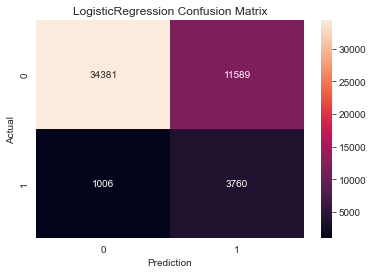

              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85    183817
         1.0       0.25      0.80      0.38     19127

    accuracy                           0.75    202944
   macro avg       0.61      0.77      0.61    202944
weighted avg       0.90      0.75      0.80    202944

              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     45970
         1.0       0.24      0.79      0.37      4766

    accuracy                           0.75     50736
   macro avg       0.61      0.77      0.61     50736
weighted avg       0.90      0.75      0.80     50736



In [39]:
model = LogisticRegression(class_weight=inv_weights) #class_weight=inv_weights
model.fit(X_train,y_train)
Heart_Diseases_results = Heart_Diseases_results.append(get_accuracy("LogisticRegression", model, X_train, y_train, X_test, y_test),ignore_index=True)

Training accuracy  : 90.57523257647429 %
Testing accuracy   : 90.60627562283192 %
precision :  0.0
recall    :  0.0
f1_score  :  0.0


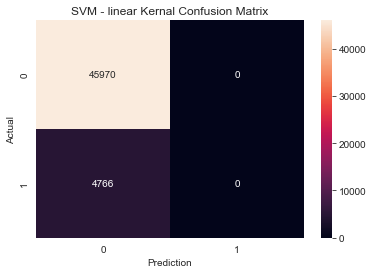

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95    183817
         1.0       0.00      0.00      0.00     19127

    accuracy                           0.91    202944
   macro avg       0.45      0.50      0.48    202944
weighted avg       0.82      0.91      0.86    202944

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     45970
         1.0       0.00      0.00      0.00      4766

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

Training accuracy  : 90.75163591926837 %
Testing accuracy   : 90.81520025228635 %
precision :  0.6244131455399061
recall    :  0.05581200167855644
f1_score  :  0.1024653312788906


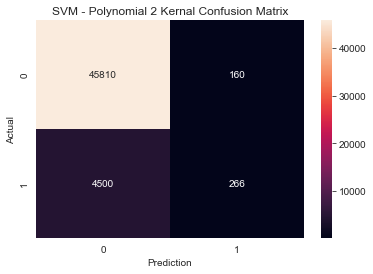

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95    183817
         1.0       0.60      0.06      0.11     19127

    accuracy                           0.91    202944
   macro avg       0.75      0.53      0.53    202944
weighted avg       0.88      0.91      0.87    202944

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     45970
         1.0       0.62      0.06      0.10      4766

    accuracy                           0.91     50736
   macro avg       0.77      0.53      0.53     50736
weighted avg       0.88      0.91      0.87     50736

Training accuracy  : 83.143133081047 %
Testing accuracy   : 83.09090192368338 %
precision :  0.09565217391304348
recall    :  0.0946286193873269
f1_score  :  0.09513764370846957


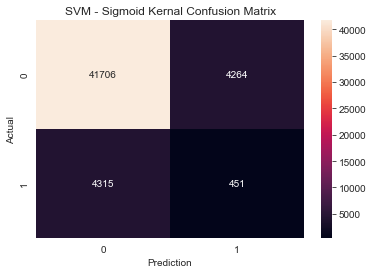

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91    183817
         1.0       0.10      0.10      0.10     19127

    accuracy                           0.83    202944
   macro avg       0.51      0.51      0.51    202944
weighted avg       0.83      0.83      0.83    202944

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91     45970
         1.0       0.10      0.09      0.10      4766

    accuracy                           0.83     50736
   macro avg       0.50      0.50      0.50     50736
weighted avg       0.83      0.83      0.83     50736



In [40]:
Heart_Diseases_results = SVM_3models(Heart_Diseases_results,X_train,y_train,X_test,y_test)
#99min

1 Fitted
2 Fitted
3 Fitted
4 Fitted
5 Fitted
6 Fitted
7 Fitted
8 Fitted
9 Fitted
10 Fitted
11 Fitted
12 Fitted
13 Fitted
14 Fitted
15 Fitted
16 Fitted
17 Fitted
18 Fitted
19 Fitted
20 Fitted


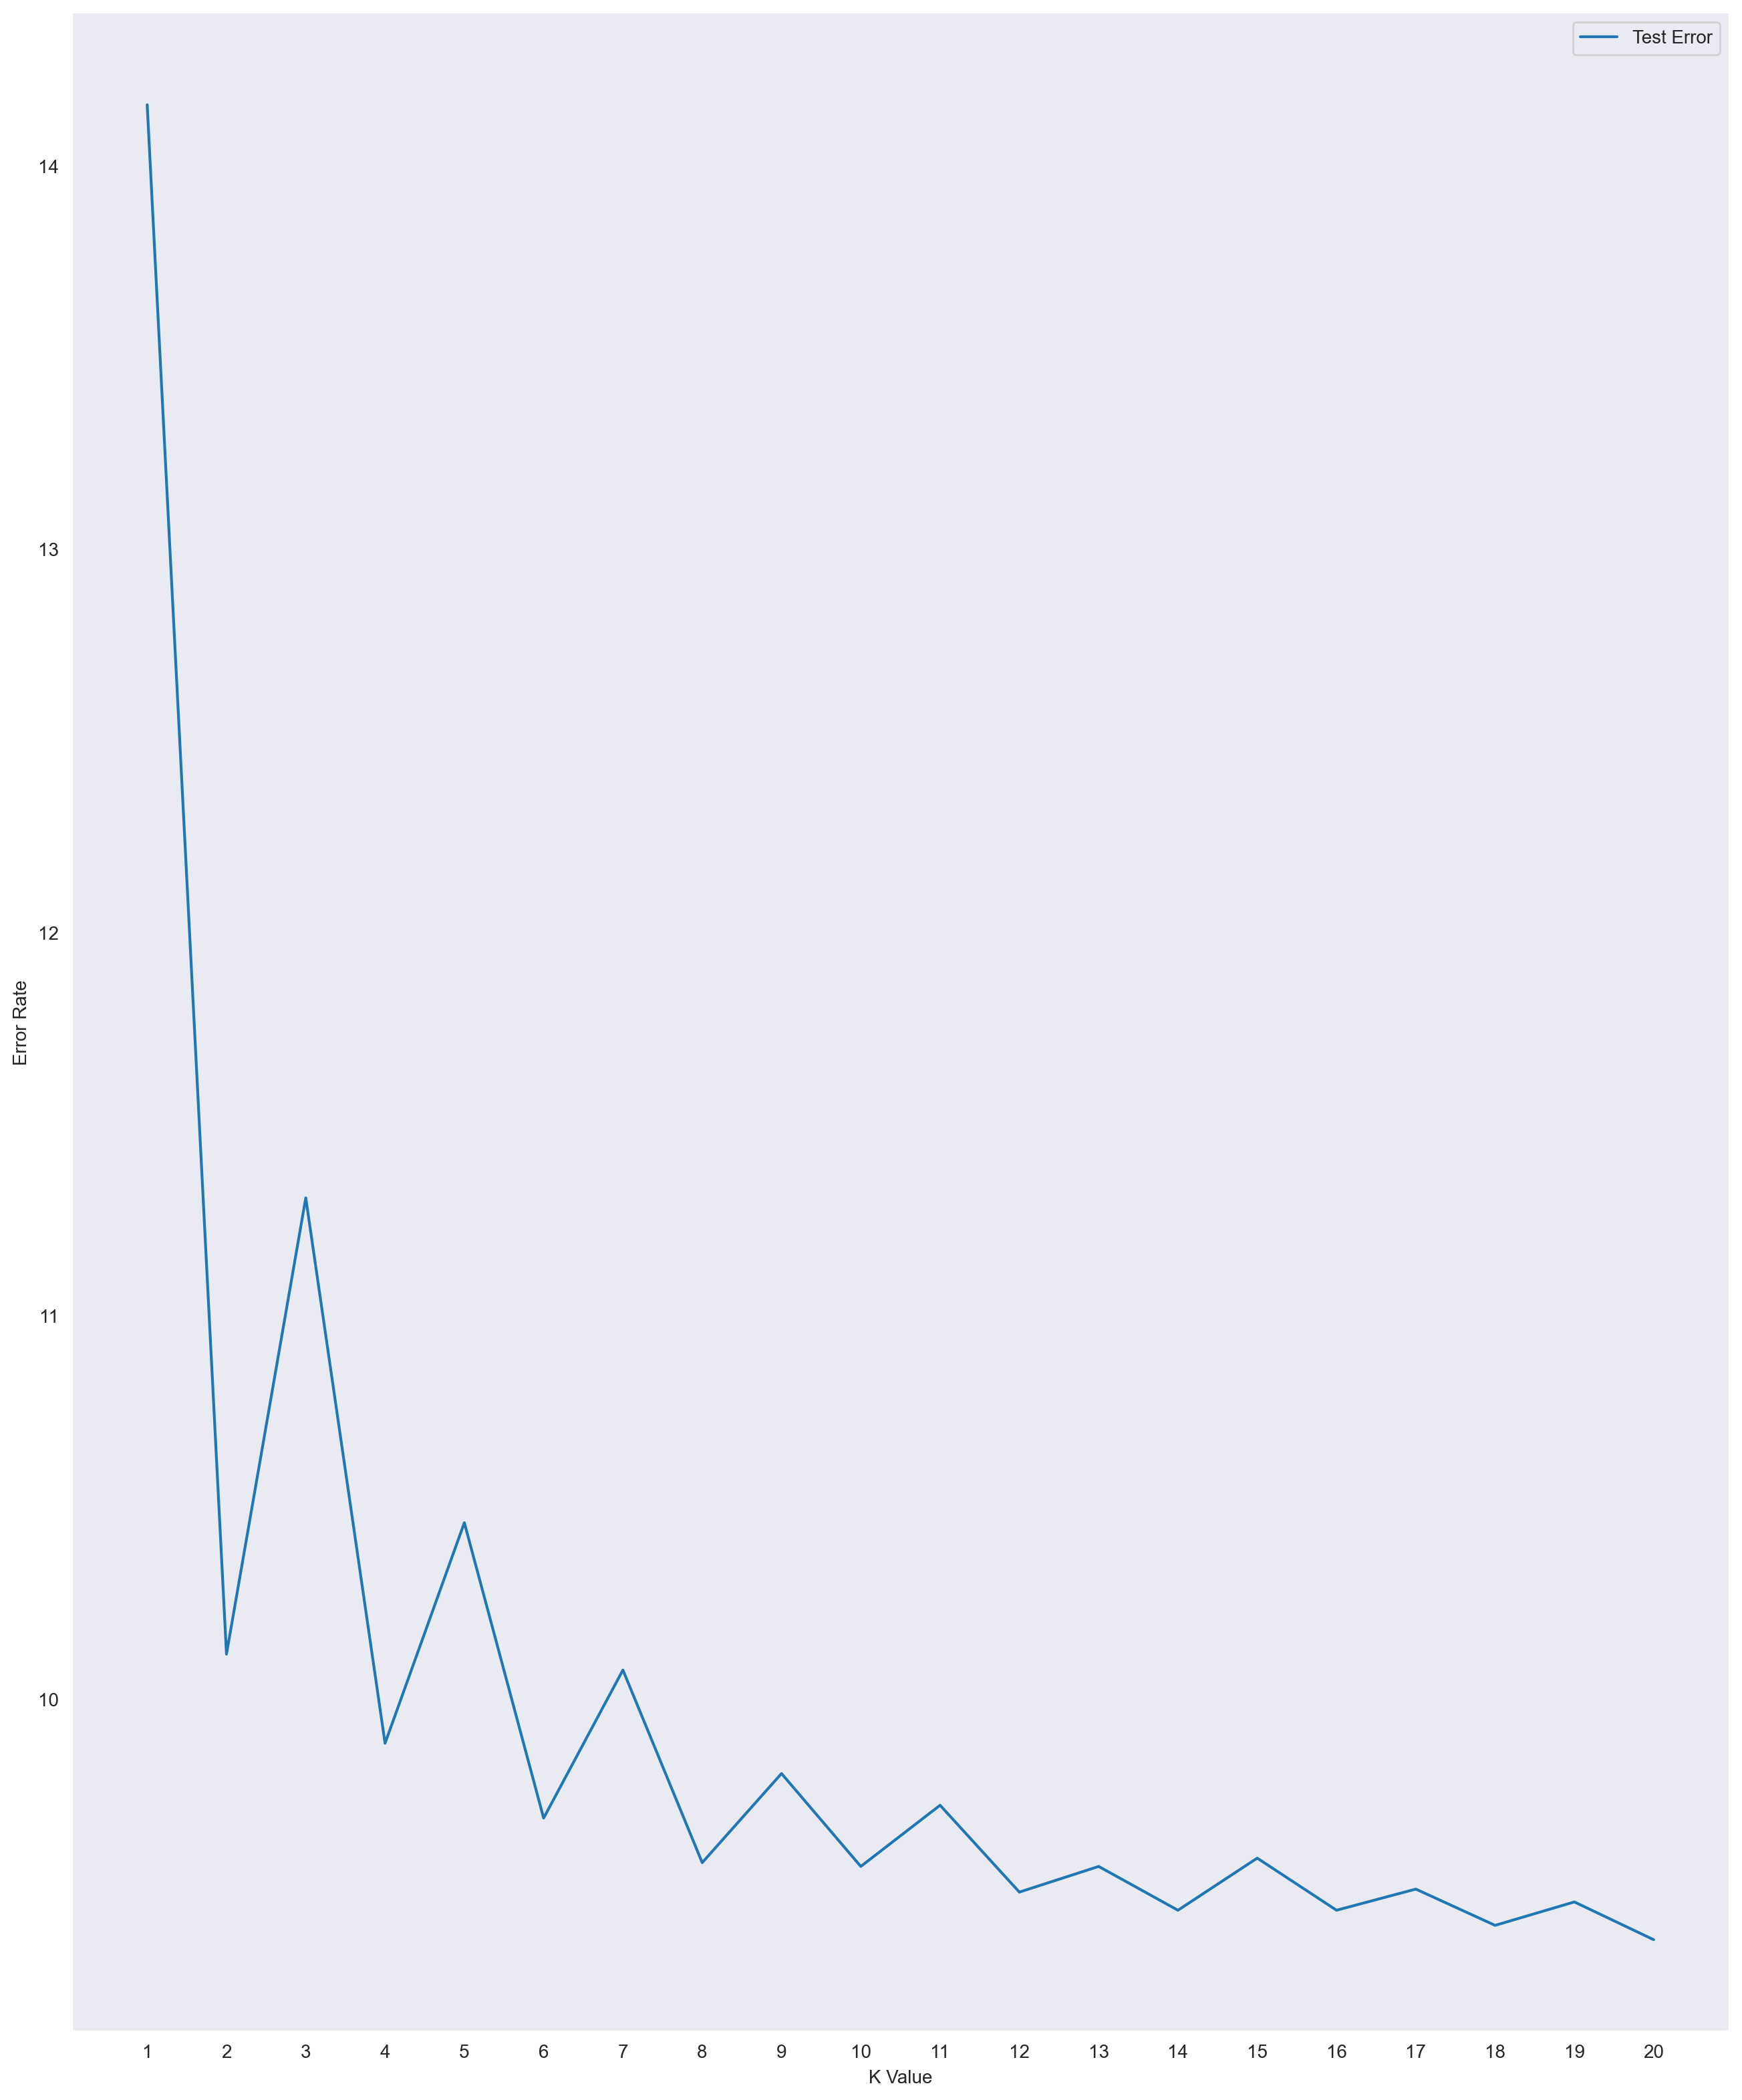

In [41]:
knn_results = getBestK_KNN(X_train,y_train,X_test,y_test,21)
plt.figure(figsize=(16,20),dpi=200)
plt.plot(range(1,21),knn_results["test_error"],label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")
plt.xticks(range(1,21))
plt.show()           #145min

> #### Choosing n = 6

In [42]:
Heart_Diseases_results = Heart_Diseases_results.append(knn_results.iloc[5])
Heart_Diseases_results = Heart_Diseases_results.drop("test_error",axis =1)
Heart_Diseases_results

,model,accuracy,precision,recall,f1_score
0,LogisticRegression,75.175418,0.244967,0.788922,0.373850
1,SVM - linear Kernal,90.606276,0.000000,0.000000,0.000000
2,SVM - Polynomial 2 Kernal,90.815200,0.624413,0.055812,0.102465
3,SVM - Sigmoid Kernal,83.090902,0.095652,0.094629,0.095138
5,KNN- n=6,90.310628,0.420043,0.082669,0.138149


>> #### Choosing Logistic Regression as the best model for classifying Heart Disease as it got high recall and fair accuracy unlike other models which scored poor recall results